In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("Methane_final.csv")

In [68]:
df = df.loc[df.region != "World"]

In [69]:
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1521,1521,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1522,1522,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1523,1523,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1524,1524,Russia & Caspian,Uzbekistan,3.845616,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [70]:
df_country_wise_emissions = df.groupby(["region"], sort=True)["emissions"].sum().to_frame()

In [71]:
df_country_wise_emissions

,emissions
region,
Africa,54197.152613
Asia Pacific,177699.611465
Central and South America,45639.989799
Europe,49208.996818
Middle East,38095.798763
North America,63347.409177
Other,15997.357175
Russia & Caspian,62421.612360


In [72]:
import country_converter as coco

In [73]:
!pip install country-converter geopy pycountry_convert folium

In [74]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [75]:
print(df_country_wise_emissions["emissions"].tolist())
print(df_country_wise_emissions.index.tolist())

[54197.15261313948, 177699.61146502104, 45639.98979930533, 49208.99681790243, 38095.79876317829, 63347.40917745978, 15997.35717530927, 62421.61236039363]
['Africa', 'Asia Pacific', 'Central and South America', 'Europe', 'Middle East', 'North America', 'Other', 'Russia & Caspian']


In [76]:
df_country = {
    "region": df_country_wise_emissions.index.tolist(),
    "emissions": df_country_wise_emissions["emissions"].tolist()
}

df_country = pd.DataFrame(df_country)

import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df_country_wise_emissions.iloc[i]["region"],
                                   df.iloc[i]['emissions']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map


In [78]:
longitudes = []
latitudes = []

regions = df_country_wise_emissions.index.tolist()
emissions = df_country_wise_emissions["emissions"].tolist()
regions_included = []
emissions_included = []

for i in range(len(regions)):
    lat_long = geolocate(regions[i])
    print(lat_long)
    try:
        longitudes.append(lat_long[0])
        latitudes.append(lat_long[1])
        regions_included.append(regions[i])
        emissions_included.append(emissions[i])
    except:
        pass
    
df_country = {
    "region": regions_included,
    "emissions": emissions_included,
    "longitudes": longitudes,
    "latitudes": latitudes
}

df_country = pd.DataFrame(df_country)

(11.5024338, 17.7578122)
(34.8528895, -82.3573713)
nan
(51.0, 10.0)
(39.3014159, -76.5888477)
(51.0000002, -109.0)
(18.443262150000002, -77.30074843023925)
(55.7482499, 37.5871508)


In [79]:
regions_included, latitudes, longitudes, emissions_included

(['Africa',
  'Asia Pacific',
  'Europe',
  'Middle East',
  'North America',
  'Other',
  'Russia & Caspian'],
 [17.7578122,
  -82.3573713,
  10.0,
  -76.5888477,
  -109.0,
  -77.30074843023925,
  37.5871508],
 [11.5024338,
  34.8528895,
  51.0,
  39.3014159,
  51.0000002,
  18.443262150000002,
  55.7482499],
 [54197.15261313948,
  177699.61146502104,
  49208.99681790243,
  38095.79876317829,
  63347.40917745978,
  15997.35717530927,
  62421.61236039363])

In [80]:
df = df_country

In [81]:
df

,region,emissions,longitudes,latitudes
0,Africa,54197.152613,11.502434,17.757812
1,Asia Pacific,177699.611465,34.852890,-82.357371
2,Europe,49208.996818,51.000000,10.000000
3,Middle East,38095.798763,39.301416,-76.588848
4,North America,63347.409177,51.000000,-109.000000
5,Other,15997.357175,18.443262,-77.300748
6,Russia & Caspian,62421.612360,55.748250,37.587151


In [82]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['latitudes']
        long = df.iloc[i]['longitudes']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]["region"],
                                   df.iloc[i]['emissions']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map


<Axes: >

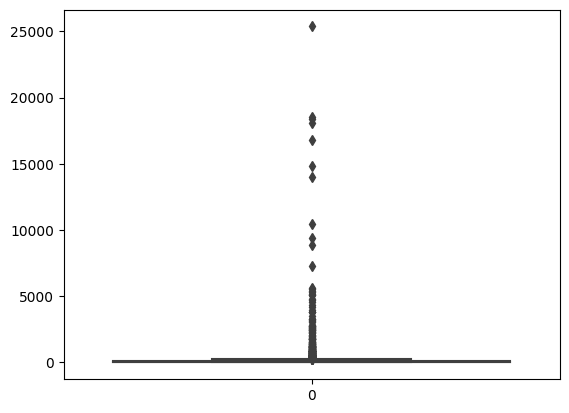

In [65]:
import seaborn as sns
df = pd.read_csv("Methane_final.csv")
df = df.loc[df.region != "World"]
sns.boxplot(df['emissions'])